# Lion Attacks

[Project extensions are at the bottom of this file]

Humanity has long feared the dark because of night-time predators. Nocturnal hunters, such as lions, have excellent low-light vision. In this project, you will investigate the influence of moonlight on hunting activity.

### Loading the Data
Most lion attacks targeting humans occur in the evening, defined here as 6pm to 10pm, after which humans are typically indoors and asleep.

The `lion-attacks-lunar-cycle.csv` file contains the number of lion attacks on humans for each day of the lunar cycle. The Moon completes a lunar cycle every 29.5 days, transitioning from a new moon to a full moon and then back to a new moon.

Load the data and take a look.

Activity Goals:
- Load the lion attack data.
- Display the dataframe.

In [55]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'lion-attacks-lunar-cycle.csv' and 'lion-belly-sizes.csv'.

# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
df = pd.read_csv('lion-attacks-lunar-cycle.csv')
df #display dataframe

,lunar_day,evening_moonlight,attacks
0,0,0.000,10
1,1,0.010,9
2,2,0.038,10
3,3,0.100,11
4,4,0.170,6
...,...,...,...
25,25,0.000,12
26,26,0.000,8
27,27,0.000,10
28,28,0.000,9


The variable `evening_moonlight` represents how bright the moon is during the evening hours from 6pm to 10pm. It ranges from 0 (not visible at all) to 1 (maximum brightness), which is affected by two factors:

- The phase of the moon
- The number of hours the moon is visible during the early night.

For almost half the lunar month there is no evening moonlight - on those days the moon rises after 10pm.

### Lion attacks vs Moonlight
Let's graph a scatter plot between lion attacks and moonlight levels.

Activity Goals:
- Create scatter plot of evening moonlight vs number of attacks.
- Label the axes.

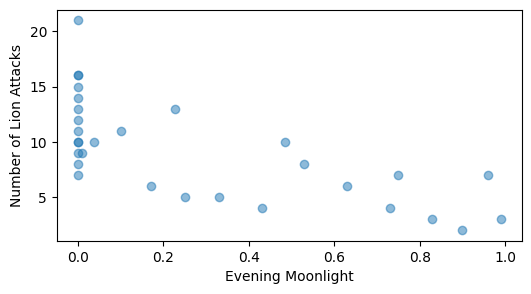

In [3]:
plt.figure(figsize=(6, 3))
plt.scatter(df['evening_moonlight'], df['attacks'], alpha=0.5)
plt.xlabel('Evening Moonlight')
plt.ylabel('Number of Lion Attacks')
plt.show()

The graph shows that as the moonlight levels increase, evening lion attacks decrease. This indicates a negative relationship.

### Modeling the relationship

Now let's fit a model to our data. A linear model fits a straight line through the data.

Since Pandas does not have built-in functions for modeling, we have provided the following python class that utilizes the scikit-learn library. While the details of scikit-learn are not a focus of this course, you can read the code below to see how it is implemented.

In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

class LinearModel:
    def __init__(self, model_name=""):
        self.model_name = model_name
        
    def fit(self, x, y):
        x = pd.DataFrame(x)
        linear_model = LinearRegression().fit(x, y)
        y_pred = linear_model.predict(x)
        self.slope = linear_model.coef_[0]
        self.intercept = linear_model.intercept_
        self.rsquared = r2_score(y, y_pred)
        
    def predict(self, x):
        return self.slope * x + self.intercept

    def plot_model(self, x_min, x_max, color="black"):
        y_min = self.predict(x_min)
        y_max = self.predict(x_max)
        plt.plot([x_min, x_max], [y_min, y_max], color=color)
        
    def print_model_info(self):
        m = self.slope
        b = self.intercept
        rsquared = self.rsquared
        model_name = self.model_name
        print(f'LinearModel({model_name}):')
        print(f'Parameters: slope = {m:.2f}, intercept = {b:.2f}')
        print(f'Equation: y = {m:.2f}x + {b:.2f}')
        print(f'Goodness of Fit (R²): {rsquared:.3f}')

Activity Goals:
- Create a linear model object.
- Fit the model to the data.

In [5]:
attack_model = LinearModel("attacks")
attack_model.fit(x=df['evening_moonlight'], y=df['attacks'])

Now that we have fit the data to a linear model, we can plot the model on top of the scatter plot.

Activity Goal:
- Plot the linear model from 0 to 1.

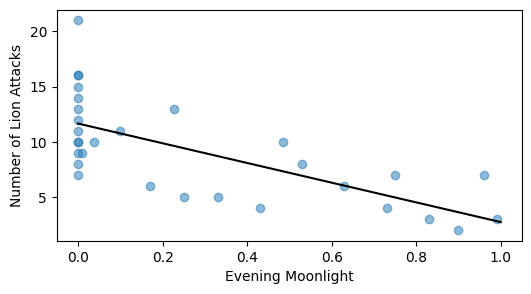

In [6]:
plt.figure(figsize=(6, 3))
plt.scatter(df['evening_moonlight'], df['attacks'], alpha=0.5)
plt.xlabel('Evening Moonlight')
plt.ylabel('Number of Lion Attacks')
attack_model.plot_model(0, 1)

That worked! The linear model creates a line through the data that minimizes the average vertical distances between each point and the line.

Linear models are expressed using the equation y = mx + b, where m is the slope of the line and b is the y intercept.

To view the actual equation and its goodness of fit, we can use the `print_model_info()` method.

In [7]:
attack_model.print_model_info()

LinearModel(attacks):
Parameters: slope = -8.92, intercept = 11.65
Equation: y = -8.92x + 11.65
Goodness of Fit (R²): 0.475


The slope of the linear model is negative and that is because as moon brightness increases, the number of lion attacks decreases.

The goodness of fit value indicates how well a model fits the data, ranging from 0 to 1. A goodness of fit value of 0.475 suggests that the model does a moderately good job at fitting the data given the high variability.

### Correlation or Causation?
Why are there fewer attacks when the moon is bright? Does the brighter moon directly cause fewer attacks? Or maybe moonlight and attacks are both being influenced by some other factor?

In data science there is an important mantra: "correlation does not imply causation".

To strengthen a causation argument, we look for two things:

- A plausible mechanism that explains the relationship
- Independent supporting evidence

One plausible mechanism for the relationship is that moonlight also helps humans see lions at night and avoid attacks.

We have a plausible mechanism, now we need to find supporting evidence using an independent dataset.

### Lion belly data
Lions can consume up to a quarter of their body weight in a single meal! To accommodate this, their stomachs swell noticeably. Since 1978, scientists in Tanzania have estimated the belly sizes of adult lions (as viewed from a safe distance!) to get a measure of how much they ate the previous night (other animals, not people!).

The `lion-belly-sizes.csv` file contains belly size estimates averaged over 11,000 sightings. Belly size ranges from 0 to 1 (empty to fully swollen). The moonlight level is estimated from the lunar cycle and takes into account the phase of the moon and the number of hours the moon is visible from 6pm to 6am.

Load in the data and take a look!

Activity Goals:
- Load the new dataset.
- Assign it to the variable `df_belly`.
- Display the dataframe.

In [8]:
df_belly = pd.read_csv('lion-belly-sizes.csv')
df_belly #display the dataframe

,lunar_day,moonlight,belly_size
0,0,0.000,0.5005
1,1,0.003,0.5073
2,2,0.013,0.5032
3,3,0.033,0.4926
4,4,0.071,0.4897
...,...,...,...
25,25,0.040,0.5044
26,26,0.023,0.5115
27,27,0.007,0.5004
28,28,0.001,0.4969


The average belly size is for each lunar day is around 0.5.

Let's see if this data supports the causation hypothesis that moonlight decreases hunting success of lions.

### Plotting belly sizes vs Moonlight

First we will create a scatterplot of the belly data, with moonlight levels on the x-axis.

Activity Goals:
- Plot belly size vs moonlight.
- Label the axes.

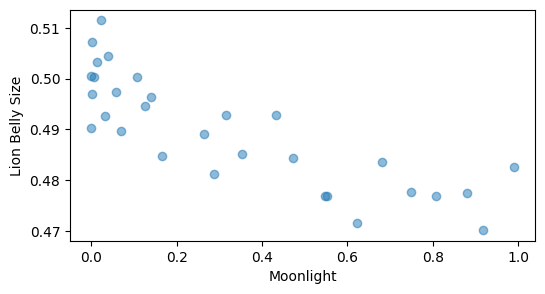

In [9]:
plt.figure(figsize=(6, 3))
plt.scatter(df_belly['moonlight'], df_belly['belly_size'], alpha=0.5)
plt.xlabel('Moonlight')
plt.ylabel('Lion Belly Size')
plt.show()

The relationship is negative: as moonlight increases, lion belly size tends to decrease.

Now let's fit a linear model to the data and plot it on top of our scatter plot.

Activity Goals:
- Create a new LinearModel object.
- Fit the linear model to the data.

In [10]:
belly_model = LinearModel("belly")
belly_model.fit(df_belly['moonlight'], df_belly['belly_size'])

Activity Goal:
- Plot the linear model from 0 to 1.

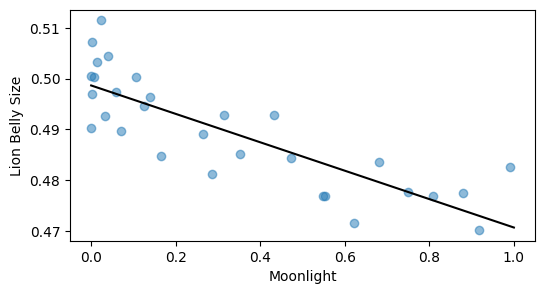

In [11]:
plt.figure(figsize=(6, 3))
plt.scatter(df_belly['moonlight'], df_belly['belly_size'], alpha=0.5)
plt.xlabel('Moonlight')
plt.ylabel('Lion Belly Size')
belly_model.plot_model(0, 1)

The fit line makes it easier to see the relationship between moonlight and lion belly size.

As the moonlight levels increase, average lion belly size decreases, indicating they had less to eat. Perhaps it really is harder to sneak up on your prey when they can see you!

Now let's check the model equation and goodness of fit.

Activity Goal:
- Display the model equation.

In [12]:
belly_model.print_model_info()

LinearModel(belly):
Parameters: slope = -0.03, intercept = 0.50
Equation: y = -0.03x + 0.50
Goodness of Fit (R²): 0.682


The slope between moonlight and lion belly size is also negative. Compared to the lion attack goodness of fit value of 0.475, the goodness of fit here is stronger. This provides supporting evidence for the causation hypothesis.

In conclusion, we have evidence from two independent data sources that moonlight levels are associated with lion hunting success. The mechanism is that prey are more likely to see and avoid lions when the moon is bright.

## Project extensions

Below is an idea for an extension:

- Use the model to predict how many people are attacked per lunar day when the moon's brightness is 0 (completely dark).

- What about when the moon's brightness is 1 (fully illuminated)?

- By what percentage do lion attacks decrease as evening moonlight increases from 0 to 1?


In [17]:
# YOUR CODE HERE (add new cells as needed)
attack_0_bright = attack_model.predict(0)
attack_1_bright = attack_model.predict(1)
percentage_decrease = ((attack_0_bright - attack_1_bright) / ((attack_1_bright + attack_0_bright) / 2)) * 100

print(f'Predicted attacks at 0 moonlight: {attack_0_bright:.2f}')
print(f'Predicted attacks at 1 moonlight: {attack_1_bright:.2f}')
print(f'Percentage decrease in attacks from 0 to 1 moonlight: {percentage_decrease:.2f}%')


Predicted attacks at 0 moonlight: 11.65
Predicted attacks at 1 moonlight: 2.74
Percentage decrease in attacks from 0 to 1 moonlight: 123.93%
